# Análise exploratória de dados

In [1]:
from IPython.display import Image, display, Markdown
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import warnings
# warnings.filterwarnings("ignore", category=UserWarning)

colors = ["#9467bd", "#057476", "#FF7A00"]
sns.set_theme(style="ticks")
sns.set_palette(sns.color_palette(colors))

## 1. Coleta inicial dos dados

In [2]:
df = sns.load_dataset("diamonds")
df.to_csv('../data/raw/data_diamonds.csv', index=False)

In [3]:
df.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
5,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
6,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
7,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
8,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
9,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


## 2. Descrição dos dados

![](../docs/assets/images/img_diamonds.png)

Diamonds é um conjunto de dados contendo preços e atributos para 53.940 diamantes lapidados. No conjunto de dados existem 10 características. As variáveis quilate, corte, cor, clareza, profundidade, tabela, preço, x, y e z são de natureza numéricas contínuas, mas as variáveis corte, cor e clareza são variáveis qualitativas ordenadas.

 - carat: é uma medida do peso do diamante. Um quilate equivale a 0,2 gramas.
 - clarity: refere-se à clareza de um diamante. Os diamantes geralmente contêm imperfeições como rachaduras ou depósitos minerais. Quanto menos perceptíveis forem as imperfeições de um diamante, melhor será sua clareza. a clareza contém 8 níveis ordenados, de “I1” (o pior) a “IF” (o melhor).
 - color: refere-se à cor do diamante. Os diamantes incolores são considerados melhores do que os diamantes com tonalidade amarela. diamantes contém diamantes de 7 cores diferentes, representados por letras diferentes. Os diamantes “D” - “F” são considerados incolores, enquanto os diamantes “G” - “J” têm uma cor muito fraca.
 - cut: refere-se a como um diamante bruto é moldado em um diamante acabado. Melhores cortes criam diamantes mais simétricos e luminosos. cut tem 5 níveis ordenados: “Justo”, “Bom”, “Muito Bom”, “Premium”, “Ideal”.
 - x, y, z: depth e table são várias medidas do tamanho de um diamante, em milímetros (mm).

In [4]:
df["cut"].unique()

['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']
Categories (5, object): ['Ideal', 'Premium', 'Very Good', 'Good', 'Fair']

In [5]:
df["color"].unique()

['E', 'I', 'J', 'H', 'F', 'G', 'D']
Categories (7, object): ['D', 'E', 'F', 'G', 'H', 'I', 'J']

In [6]:
df["clarity"].unique()

['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']
Categories (8, object): ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1']

In [7]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [8]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## 3. Dicionário dos dados

In [9]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [10]:
# Comando utilizado para verificar informações sobre os dados(Tipos de variáveis, quantidade de registros, etc.)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [11]:
dicionario_diamonds = pd.DataFrame([
    {
        'variavel': 'carat',
        'descricao': 'Peso do diamante',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'cut',
        'descricao': 'Qualidade do corte',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },{
        'variavel': 'color',
        'descricao': 'Cor do diamante',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },{
        'variavel': 'clarity',
        'descricao': 'Pureza do diamante',
        'tipo': 'qualitativa',
        'subtipo': 'ordinal'
    },{
        'variavel': 'depth',
        'descricao': 'Porcentagem de profundidade total',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'table',
        'descricao': 'Largura do topo do losango em relação ao ponto mais largo',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'price',
        'descricao': 'Preço em dólares americanos',
        'tipo': 'quantitativa',
        'subtipo': 'discreta'
    },{
        'variavel': 'x',
        'descricao': 'Comprimento em mm',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'y',
        'descricao': 'Largura em mm',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    },{
        'variavel': 'z',
        'descricao': 'Profundidade em mm',
        'tipo': 'quantitativa',
        'subtipo': 'continua'
    }
])

dicionario_diamonds.to_csv('../data/external/dictionary_diamonds.csv', index=False)
dicionario_diamonds

,variavel,descricao,tipo,subtipo
0,carat,Peso do diamante,quantitativa,continua
1,cut,Qualidade do corte,qualitativa,ordinal
2,color,Cor do diamante,qualitativa,ordinal
3,clarity,Pureza do diamante,qualitativa,ordinal
4,depth,Porcentagem de profundidade total,quantitativa,continua
5,table,Largura do topo do losango em relação ao ponto...,quantitativa,continua
6,price,Preço em dólares americanos,quantitativa,discreta
7,x,Comprimento em mm,quantitativa,continua
8,y,Largura em mm,quantitativa,continua
9,z,Profundidade em mm,quantitativa,continua


São 10 variáveis, sendo 3 qualitativas ordinais e 7 quantitativas, sendo 6 contínuas e 1 discreta.

In [12]:
df.shape

(53940, 10)

## 3. Perguntas de partida e hipóteses

- Existem dados faltantes, se sim quantos e em quais variáveis?
- Qual a distribuição dos dados (variável por variável)?
- Existe alguma corelação entre os preços e as características físicas dos diamantes?

#### - Existem dados faltantes, se sim quantos e em quais variáveis?

In [13]:
# Comando utilizado para avaliar se alguma variável possui valor nulo ou chamados de valores missing ou NAM (Not Available).

df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

Não existem valores faltantes neste dataset.

#### - Qual a distribuição dos dados (variável por variável)?

In [14]:
# Dados Estatísticos
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


Existem cinco possíveis qualidade de corte, sete possíveis cores de diamante e 8 possíveis medidas de clareza do diamante.

- O corte mais frequente é o ideal
- A cor do diamante mais frequente é a G
- A medida da clareza do diamante mais frequente é SI1
- O peso médio do diamante (carat) é 0.8 quilates, com um mínimo de 0,2 quilates e máximo 5,01 quilates, aproximadamente
- A Porcentagem de profundidade (depth) média é 61.7 %, com um mínimo de 43 % e máximo 79 %, aproximadamente
- A face plana do diamante (table) média é de 57.4 mm, com um mínimo de 43 mm e máximo 95 mm, aproximadamente
- O comprimento do diamante (x) médio é 5,7 mm, com um mínimo de 0 e máximo 10.7 mm, aproximadamente
- A largura do diamante (y) média é 5,7 mm, com um mínimo de 0 e máximo 58.9 mm, aproximadamente
- A profundidade do diamante (z) média é 3,5 mm, com um mínimo de 0 e máximo 31.8 mm, aproximadamenteExistem cinco possíveis qualidade de corte, sete possíveis cores de diamante e 8 possíveis medidas de clareza do diamante.

##### Distribuição das variáveis qualitativas

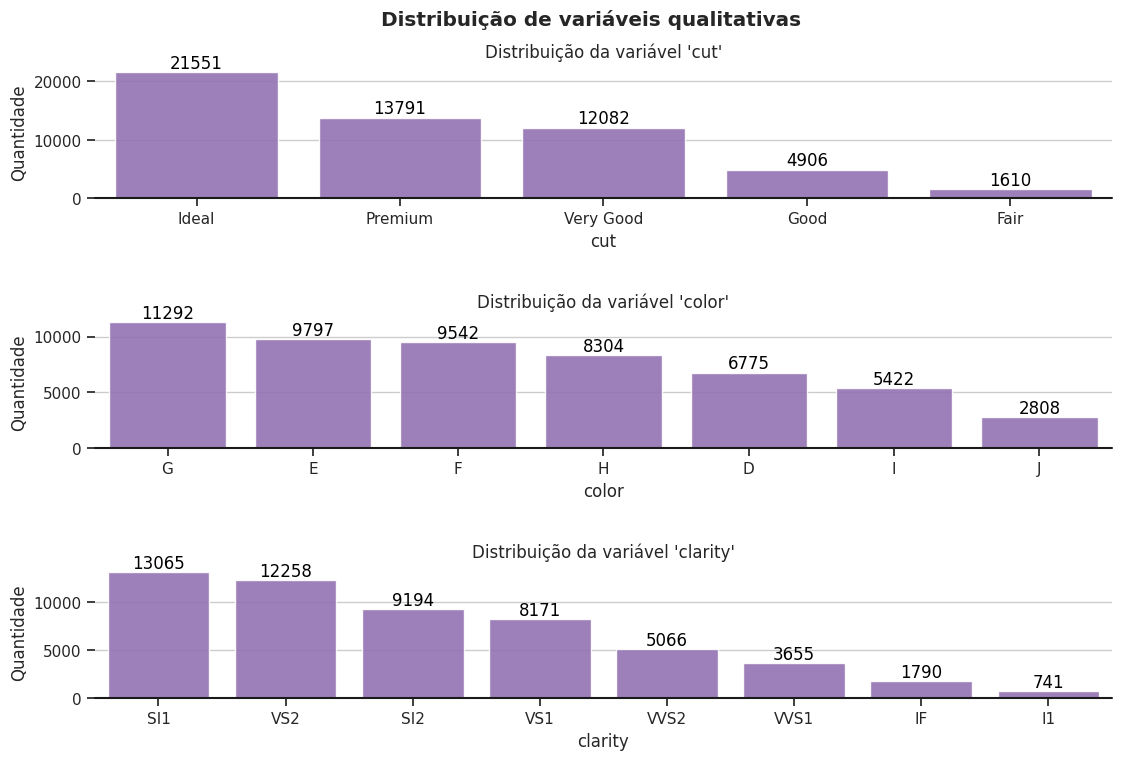

In [15]:

fig, axes = plt.subplots(3, 1, figsize=(12,8))
plt.tight_layout(pad=4, w_pad=6, h_pad=5)
fig.suptitle('Distribuição de variáveis qualitativas', fontweight='bold')
for i, variavel in enumerate(dicionario_diamonds.query("tipo == 'qualitativa'").variavel.to_list()):
    order = df[variavel].value_counts().index
    ax = sns.countplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
        order=order
    )
    ax.bar_label(
        ax.containers[0],
        fmt='%.0f',
        color='black'
    )
    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()


##### Distribuição das variáveis quantitativasA partir das visualizações acima podemos dizer que:

- A maioria da qualidade do corte é do tipo corte ideal;
- A cor com maior predominância é a G e em menor quantidade a J;
- A clareza do diamante é maior para o SI1 e I1 é menor quantidade.

##### Distribuição das variáveis quantitativas

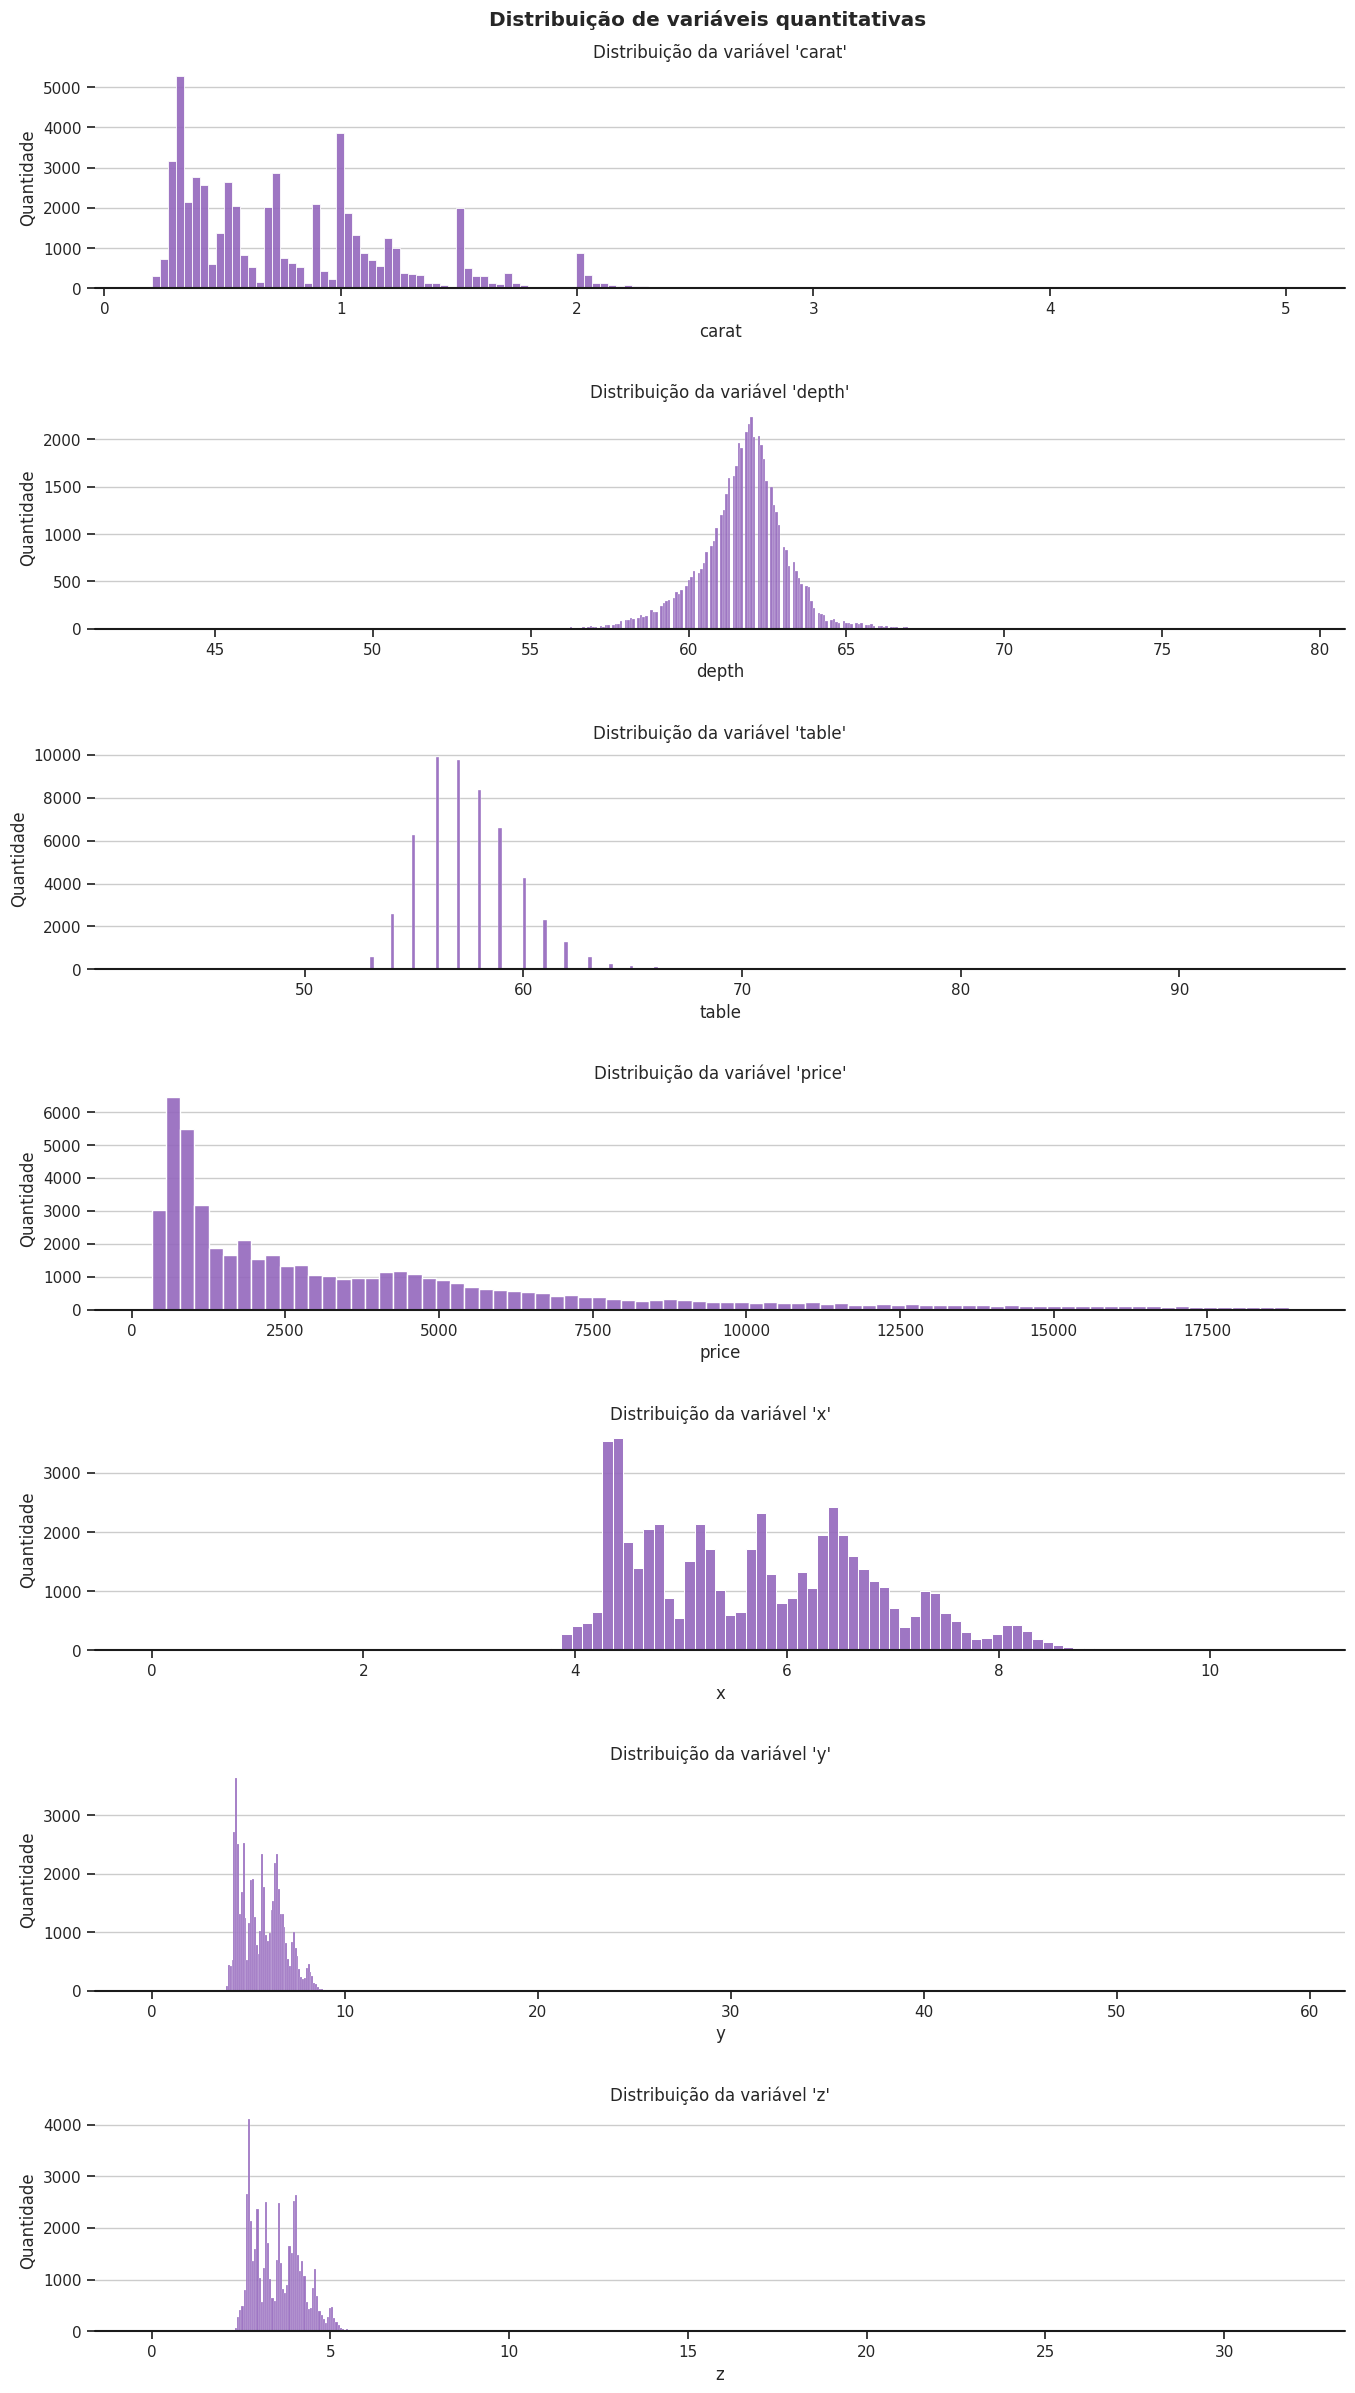

In [16]:
fig, axes = plt.subplots(7, 1, figsize=(15, 25))
plt.tight_layout(pad=6, w_pad=4, h_pad=5)
fig.suptitle('Distribuição de variáveis quantitativas', fontweight='bold')
for i, variavel in enumerate(dicionario_diamonds.query("tipo == 'quantitativa'").variavel.to_list()):
    ax = sns.histplot(
        data=df,
        x=variavel,
        ax=axes.flatten()[i],
        color=colors[0],
        alpha=0.9,
    )

    ax.set(frame_on=False)
    ax.axhline(0, color="k", clip_on=False)
    ax.set_title(f"Distribuição da variável '{variavel}'")
    plt.xlabel(variavel)
    ax.set_ylabel('Quantidade')
    ax.grid(axis='y', linestyle='-')
plt.show()
 

Visualizando os histogramas acima podemos observar que:

- A distribuição da peso em quilates (carat) tende a apresentar valores maiores do que 1 quilate.
- A distribuição da variável Porcentagem de profundidade total (depth) tende a uma curva normal e seu valor mais frequente tem valores próximos a 62 %.
- A distribuição da variável price largura do topo do diamante (table) tem valores entre 50 % e 70 %.
- A distribuição da da variável preços (price) tende a ter em sua maioria valores menores que 5.000,00 dólares.
- A distribuição da da variável x apresenta valores na sua maioria entre 4 mm e 8 mm, aproximadamente.
- A distribuição da da variável y valores maiores que 2 mm e menores que 10 mm, aproximadamente.
- A distribuição da da variável z apresenta na sua maior quantidade valores menores que 5 mm.

#### - Existe alguma corelação entre os preços e as características físicas dos diamantes?

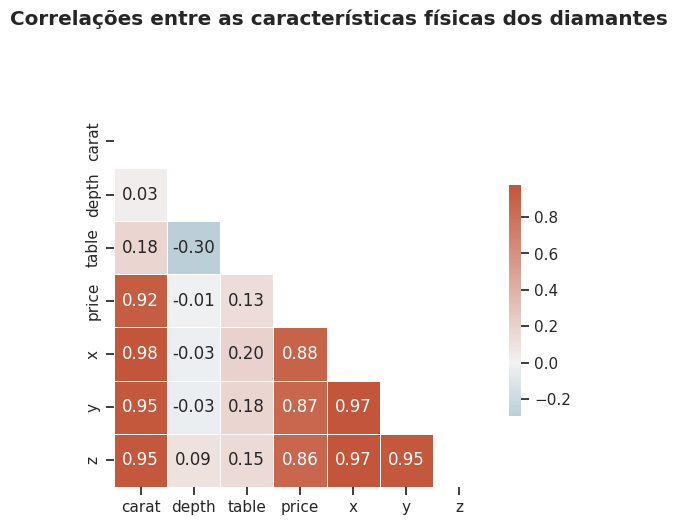

In [22]:
corr = df.corr(numeric_only = True)

mask = np.triu(np.ones_like(corr, dtype=bool))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(6,6))
ax = sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True, 
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlações entre as características físicas dos diamantes", fontweight='bold')
plt.show()

In [20]:
correlacao_price_caracteristicas = corr['price'].sort_values(ascending=False)
print(correlacao_price_caracteristicas)

price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64


A partir do gráfico de correlação, é possível observar que a variável dos preços tem uma forte correlação com as variáveis largura (x), comprimento (y), profundidade (z) e o peso dos diamantes.

## 5. Insights


- O corte mais frequente é o ideal.
- A medida da clareza do diamante mais frequente é SI1
- O peso médio do diamante (carat) é 0.8 quilates, com um mínimo de 0,2 quilates e máximo 5,01 quilates, aproximadamente
- A cor com maior predominância é a G e em menor quantidade a J;
- A clareza do diamante é maior para o SI1 e I1 é menor quantidade.
- A distribuição da peso em quilates (carat) tende a apresentar valores maiores do que 1 quilate.
- A distribuição da variável Porcentagem de profundidade tem valores mais frequente tem valores próximos a 62 %.
- A distribuição da variável price largura do topo do diamante (table) tem valores entre 50 % e 70 %.
- A distribuição da da variável preços (price) tende a ter em sua maioria valores menores que 5.000,00 dólares.
- A distribuição da da variável x apresenta valores na sua maioria entre 4 mm e 8 mm, aproximadamente.
- A distribuição da da variável y valores maiores que 2 mm e menores que 10 mm, aproximadamente.
- A distribuição da da variável z apresenta na sua maior quantidade valores menores que 5 mm.